import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn


In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:

from sklearn import svm
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score, classification_report

Data Importing 

In [4]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


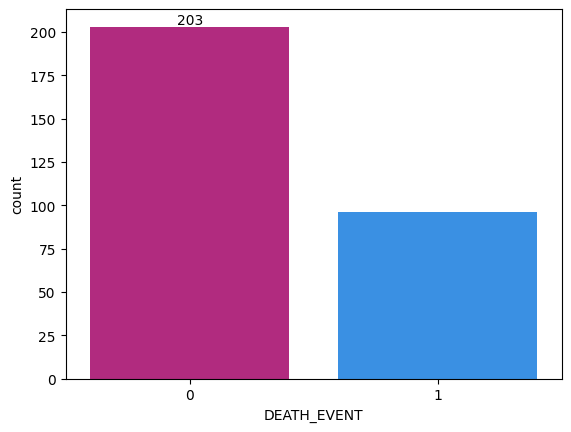

In [7]:
cols = ["#C71585", "#1E90FF"]
ax = sns.countplot(x="DEATH_EVENT", hue="DEATH_EVENT", data=df, palette=cols, legend=False)
ax.bar_label(ax.containers[0])
plt.show()


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


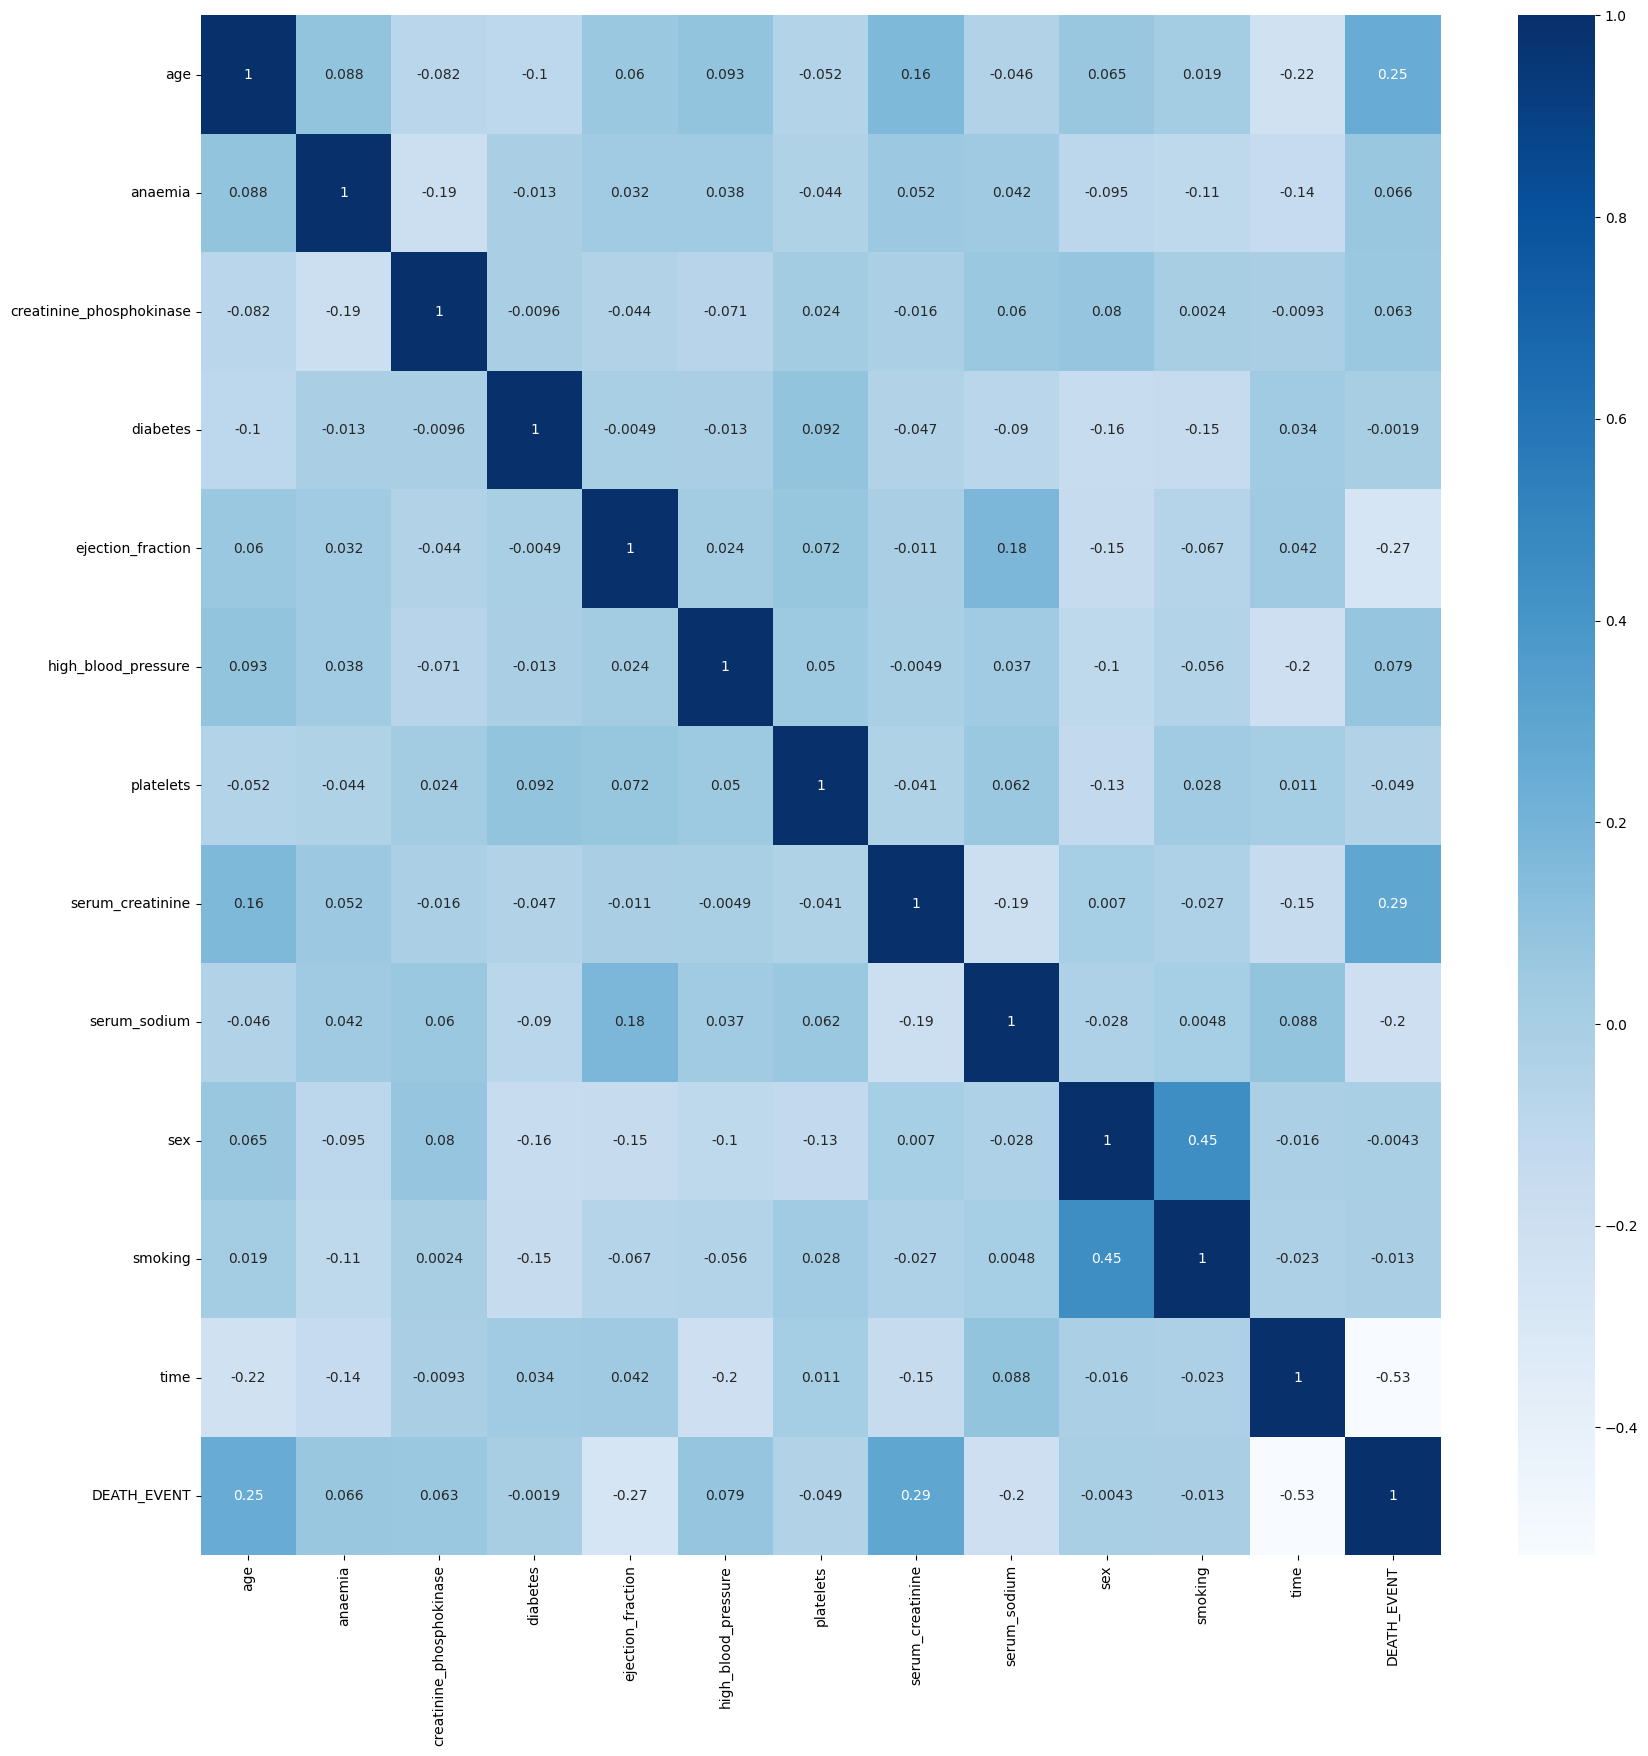

In [9]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

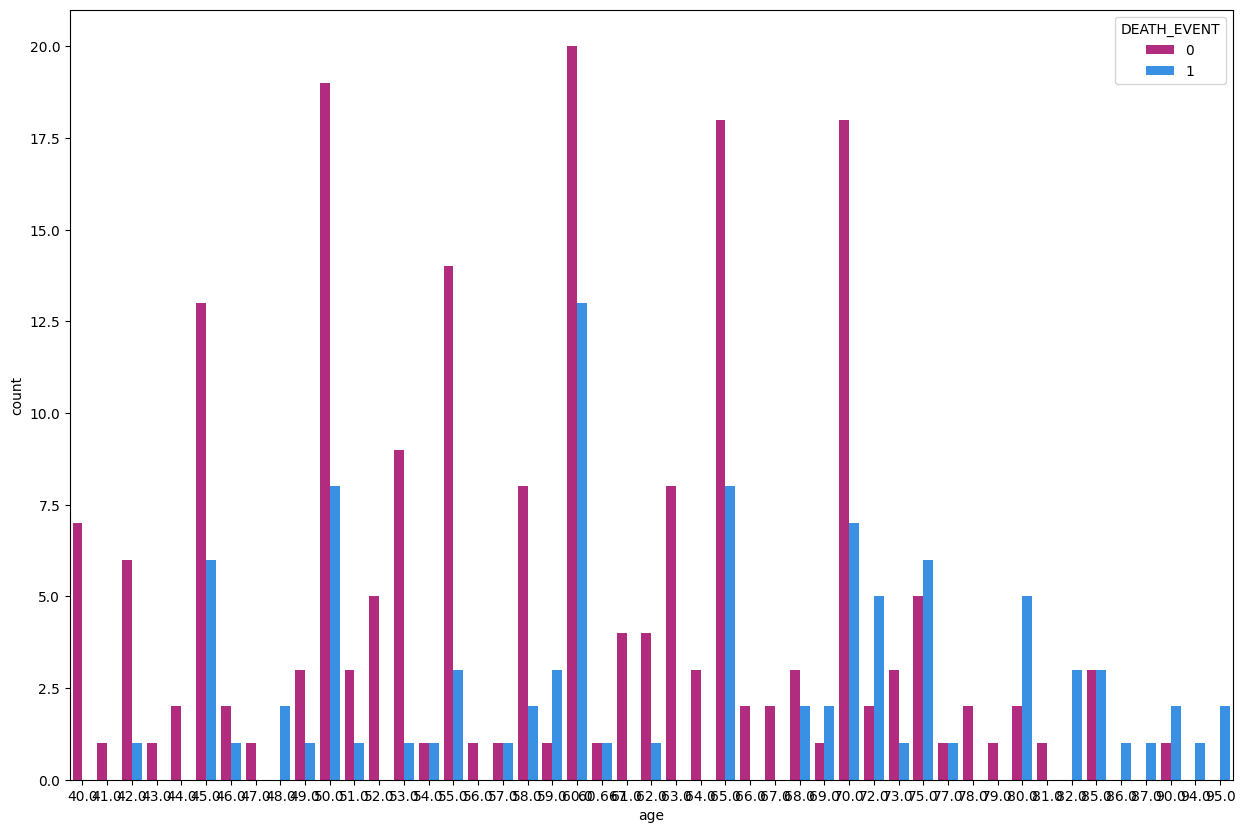

In [10]:
plt.figure(figsize=(15, 10))
days_of_week = sns.countplot(x='age', data=df, hue="DEATH_EVENT", palette=cols)
plt.show()

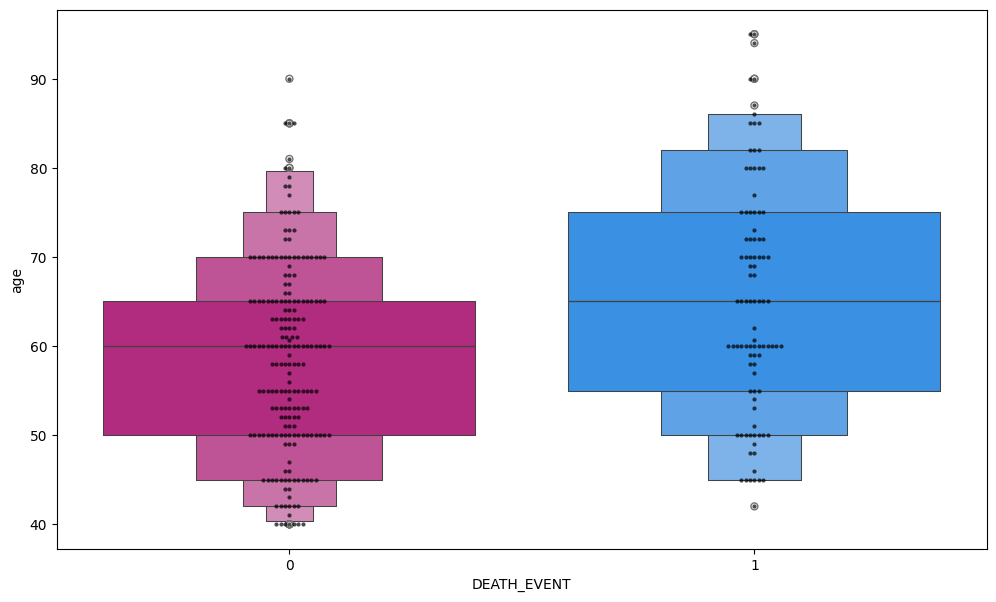

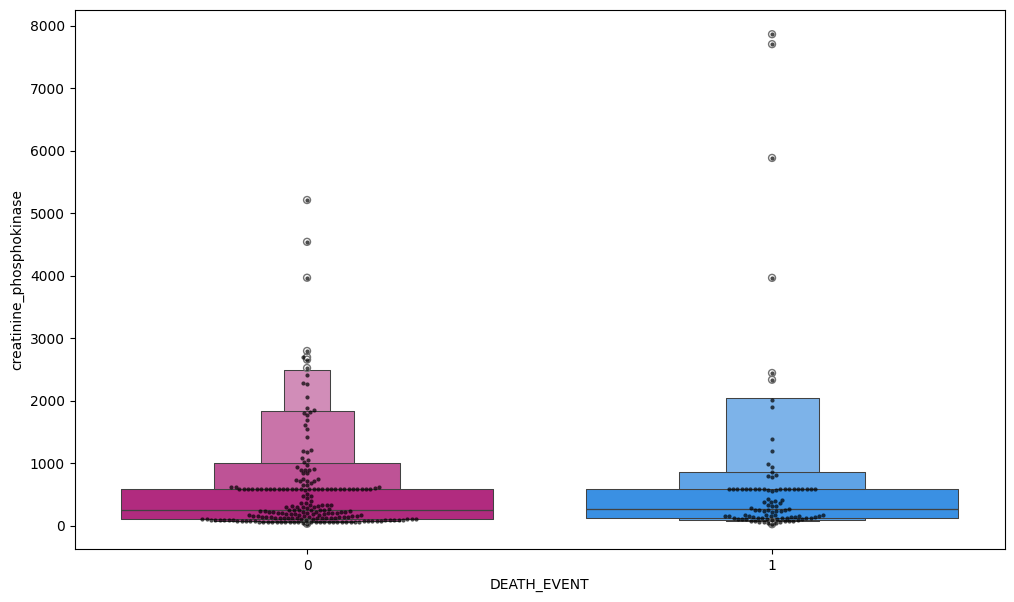

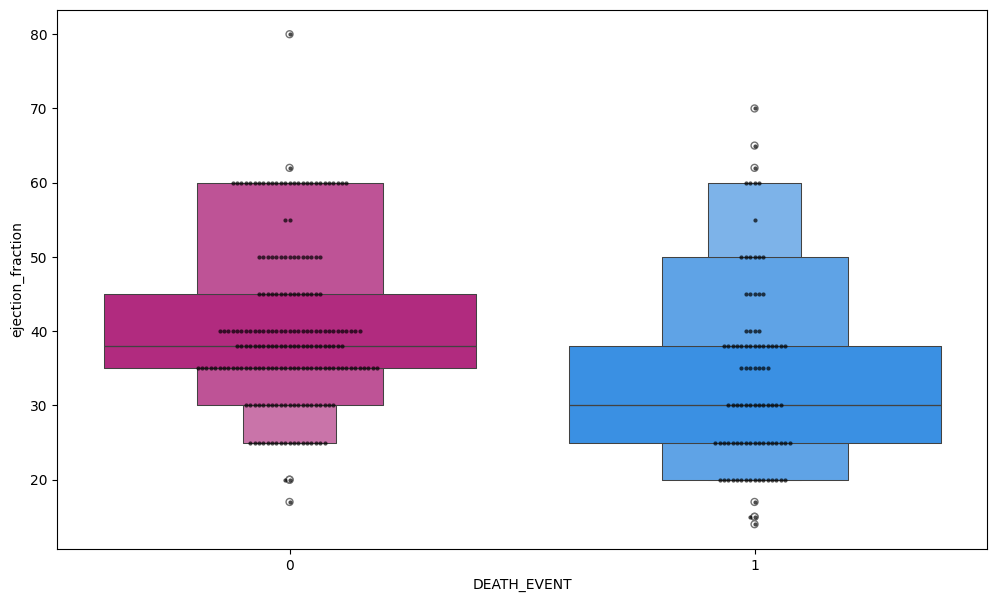

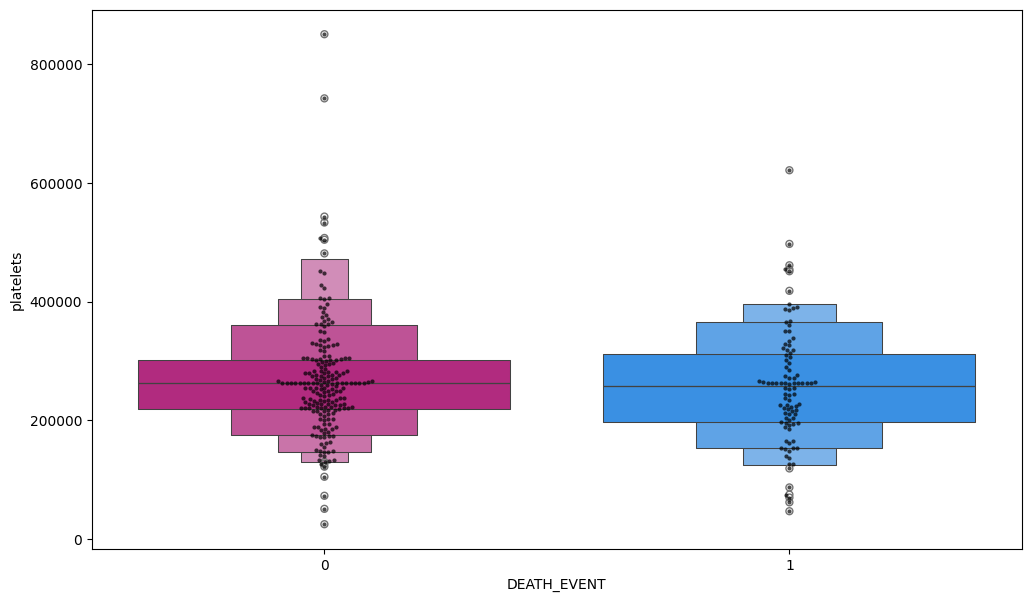

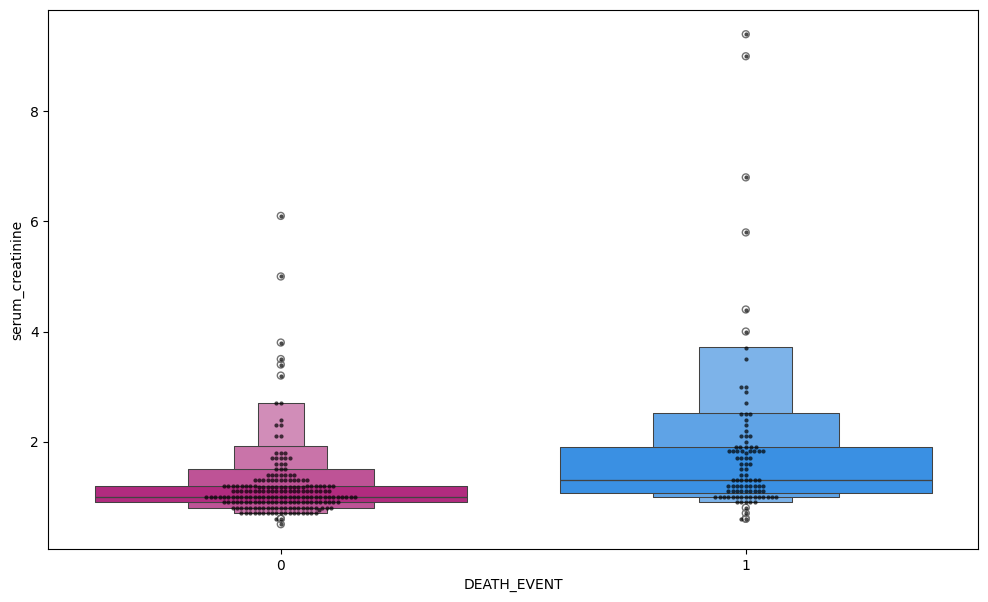

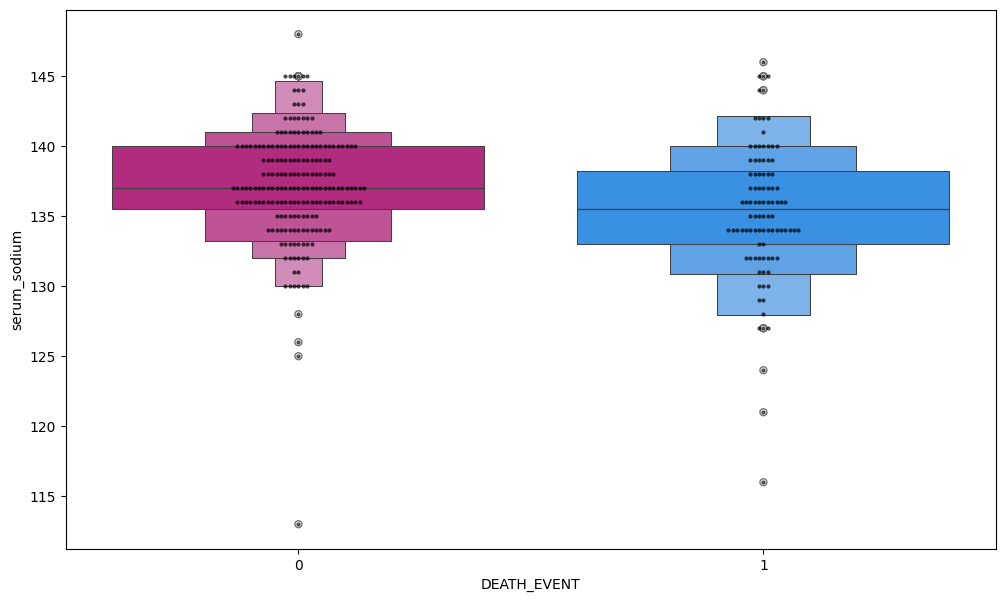

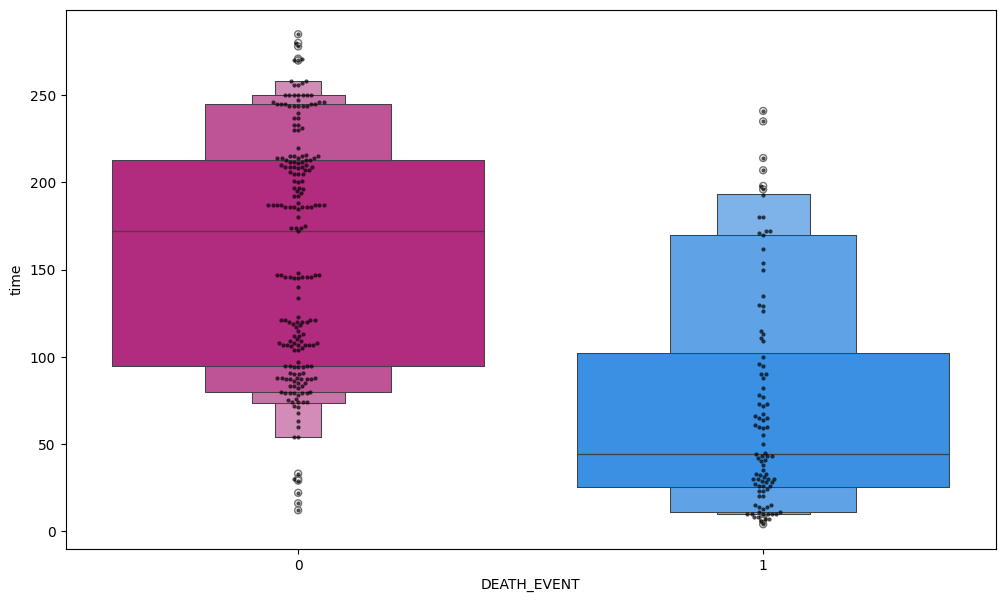

In [11]:
feature = ["age", "creatinine_phosphokinase", "ejection_fraction", 
           "platelets", "serum_creatinine", "serum_sodium", "time"]
palette=cols
for i in feature:
    plt.figure(figsize=(12, 7))
    sns.swarmplot(
        x="DEATH_EVENT", 
        y=i, 
        data=df, 
        color="black", 
        alpha=0.7, 
        size=3
    )
    sns.boxenplot(
        x="DEATH_EVENT", 
        y=i, 
        hue="DEATH_EVENT", 
        data=df, 
        palette=cols, 
        legend=False
    )

    plt.show()


Data Preprocessing 

In [12]:
X = df.drop(["DEATH_EVENT"], axis = 1)
y = df ["DEATH_EVENT"]

In [13]:
col_name = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_name)

In [14]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


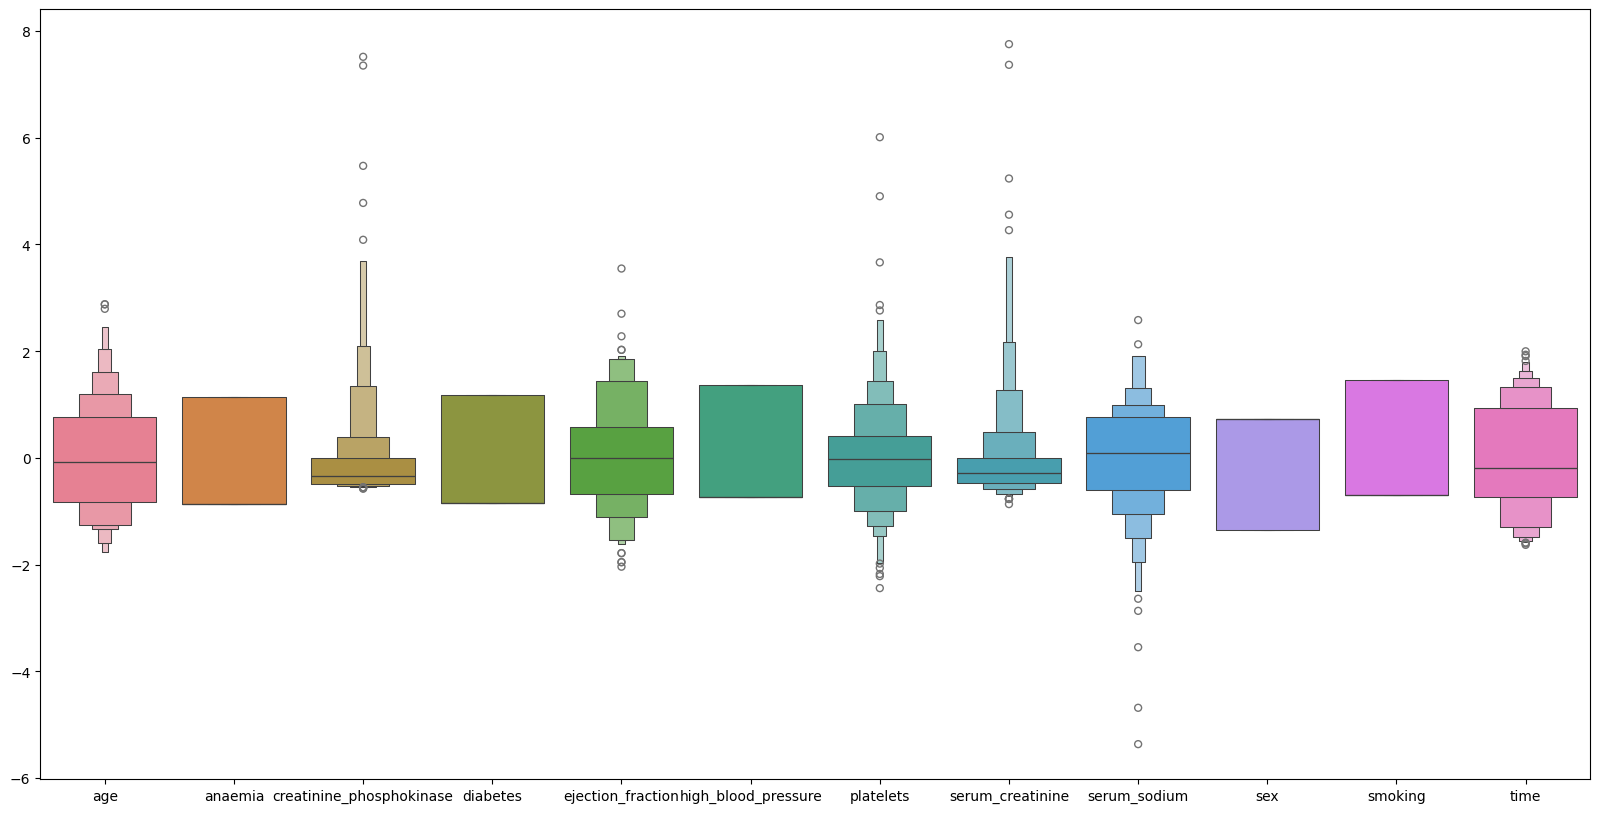

In [15]:
plt.figure(figsize=(20,10)) 
sns.boxenplot(data=X_scaled)
plt.show()

In [16]:
X_train, X_tests, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

Model Training

 ANN

In [17]:
early_stopping = callbacks. EarlyStopping(
    min_delta = 0.001, patience = 20, restore_best_weights = True)

model = Sequential()

model.add(Dense(units = 16, kernel_initializer ='uniform', activation ='relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [18]:
model.compile(optimizer='adam' , loss= 'binary_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 425 (1.66 KB)
Trainable params: 425 (1.66 

In [20]:
history = model.fit(X_train, y_train, batch_size=25, epochs=100, callbacks=[early_stopping], validation_split=0.25)

Epoch 1/100


7/7 [==============================] - 1s 32ms/step - loss: 0.6925 - accuracy: 0.7179 - val_loss: 0.6923 - val_accuracy: 0.6038
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.7308 - val_loss: 0.6915 - val_accuracy: 0.6038
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6887 - accuracy: 0.7308 - val_loss: 0.6906 - val_accuracy: 0.6038
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6864 - accuracy: 0.7308 - val_loss: 0.6896 - val_accuracy: 0.6038
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6841 - accuracy: 0.7308 - val_loss: 0.6884 - val_accuracy: 0.6038
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6809 - accuracy: 0.7308 - val_loss: 0.6868 - val_accuracy: 0.6038
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6772 - accuracy: 0.7308 - val_loss: 0.6849 - val_accuracy: 0.6038
Epoch 8/100
7/7 [=======

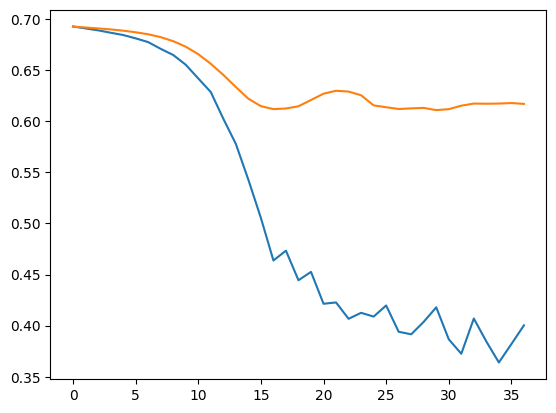

In [21]:
history_df = pd.DataFrame (history.history)

plt.plot(history_df.loc[:, ['loss']], label = "Training loss") 
plt.plot(history_df.loc[:, ['val_loss']], label = "Validation loss")

plt.show()

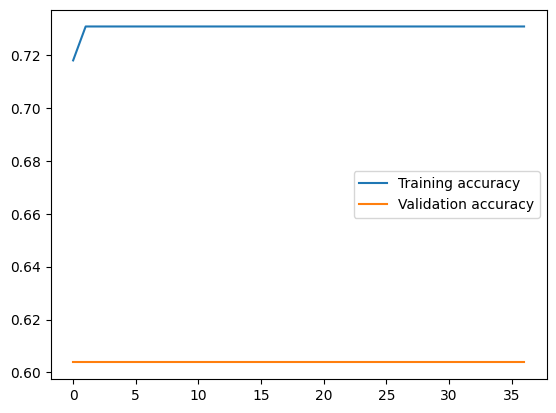

In [22]:
plt.plot(history_df.loc[:, ['accuracy']], label="Training accuracy")
plt.plot(history_df.loc[:, ['val_accuracy']], label="Validation accuracy")
plt.legend()
plt.show()

In [23]:
y_pred = model.predict(X_tests)

3/3 [==============================] - 0s 3ms/step


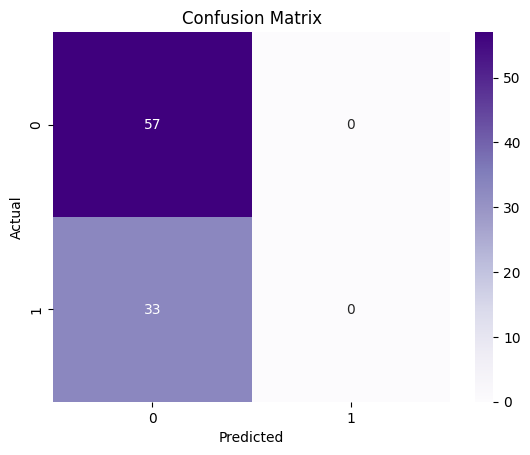

In [24]:
y_pred_classes = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_classes)

# Plot heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
y_pred = (y_pred > 0.5)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        57
           1       0.00      0.00      0.00        33

    accuracy                           0.63        90
   macro avg       0.32      0.50      0.39        90
weighted avg       0.40      0.63      0.49        90



c:\Users\91994\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\91994\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\91994\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [27]:
model.save("heart_failure_ann.keras")

print("✅ Model saved as heart_failure_ann.keras")

✅ Model saved as heart_failure_ann.keras


In [28]:
print(tf.__version__)


2.15.0
